Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
QR Code saved as my_qr.png


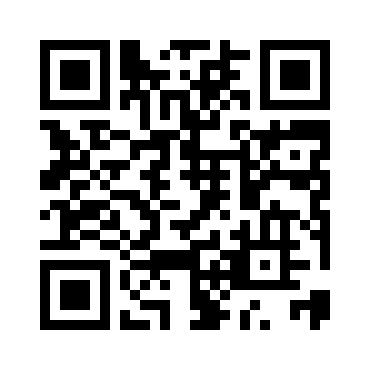

Barcode saved as my_barcode.png


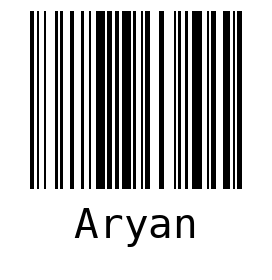

QR Code saved as aryan.png


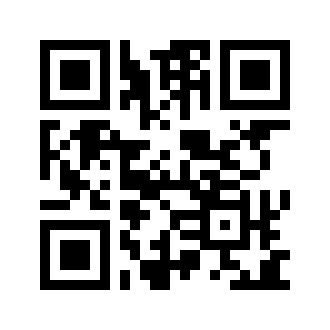

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Install necessary libraries
!apt-get install libzbar0 # Required for decoding
!pip install qrcode python-barcode pyzbar opencv-python numpy pillow

import qrcode
import barcode
from barcode.writer import ImageWriter
import cv2
import numpy as np
from pyzbar.pyzbar import decode
from IPython.display import display, Image

# Function to generate a QR Code
def generate_qr_code(data, filename="qr_code.png"):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    img = qr.make_image(fill="black", back_color="white")
    img.save(filename)
    print(f"QR Code saved as {filename}")
    display(Image(filename))

# Function to generate a Barcode
def generate_barcode(data, filename="barcode.png"):
    code128 = barcode.get_barcode_class("code128")
    my_barcode = code128(data, writer=ImageWriter())
    my_barcode.save(filename.split(".")[0]) # Saves as barcode.png
    print(f"Barcode saved as {filename}")
    display(Image(filename))

# Function to decode QR/Barcode from an image
def decode_qr_barcode(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    barcodes = decode(gray)

    for barcode in barcodes:
        barcode_data = barcode.data.decode("utf-8")
        barcode_type = barcode.type
        print(f"Decoded Data: {barcode_data}, Type: {barcode_type}")

# Example usage
generate_qr_code("https://youtube.com/@hansibaazi?si=jbY5h_fxgA0ao6rJ", "my_qr.png")
generate_barcode("Aryan",  "my_barcode.png")
generate_qr_code("singharyan8291@gmail.com", "aryan.png")


# Upload an image to decode
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Display and decode uploaded QR/Barcode
display(Image(image_path))
decode_qr_barcode(image_path)
